<a href="https://colab.research.google.com/github/Ilyass-Dahaoui/Artificial-intelligence-for-energy/blob/main/TP3_ANN_for_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense

In [10]:
D = pd.read_csv("/content/dataTP.txt",delimiter='\t')
D.head()

,Hour,PAC,Tm,Tamb,TOA,GHI
0,10,3802.507576,42.347879,14.50,6181.305,4278.672
1,11,3059.995455,55.044545,15.98,7261.285,5195.536
2,12,5104.446970,67.297576,17.46,7637.228,5525.204
3,13,5095.312121,77.016667,18.24,7283.514,5236.036
4,14,4968.204545,80.223030,18.45,6224.230,4346.761


In [11]:
D['PAC'] = np.where((D.PAC <= 1000) | (D.PAC == 0), 1, D.PAC)
D['PAC'] = np.where((D.PAC <= 2000) & (D.PAC>1000), 2, D.PAC)
D['PAC'] = np.where((D.PAC <= 3000) & (D.PAC>2000), 3, D.PAC)
D['PAC'] = np.where((D.PAC <= 4000) & (D.PAC>3000), 4, D.PAC)
D['PAC'] = np.where((D.PAC <= 5000) & (D.PAC>4000), 5, D.PAC)
D['PAC'] = np.where((D.PAC <= 6500) & (D.PAC>5000), 6, D.PAC)
D.PAC

0       4.0
1       4.0
2       6.0
3       6.0
4       5.0
       ... 
9389    1.0
9390    1.0
9391    1.0
9392    2.0
9393    5.0
Name: PAC, Length: 9394, dtype: float64

La variable PAC a été catégorisée en six groupes 1 à 6 en fonction de différentes plages de valeurs.
Les valeurs de PAC ont été mises à jour en fonction des conditions spécifiées pour chaque plage. Par exemple, les valeurs inférieures ou égales à 1000 ou égales à 0 ont été mises à 1, celles entre 1000 inclus et 2000 ont été mises à 2, et ainsi de suite.

In [12]:
# Décompte des résultats
occurrences = D['PAC'].value_counts()
print(occurrences)

1.0    3106
6.0    1939
5.0    1762
2.0    1029
4.0     863
3.0     695
Name: PAC, dtype: int64


In [13]:
y = keras.utils.to_categorical(D.PAC-1)
#Vérification
print(np.sum(y,axis=0))


[3106. 1029.  695.  863. 1762. 1939.]


La conversion de la variable PAC en représentation catégorielle à l'aide de la fonction to_categorical de Keras a généré six catégories distinctes, chaque valeur de PAC étant encodée en one-hot. En soustrayant 1 de 'PAC' lors de cette conversion, les indices des catégories vont de 0 à 5. La somme sur l'axe 0 du tableau résultant indique le nombre d'échantillons dans chaque catégorie respective. Par exemple, il y a 3106 échantillons dans la première catégorie, 1029 dans la deuxième, et ainsi de suite. Cette représentation one-hot offre une manière concise et informatique d'exprimer la distribution des échantillons dans les différentes catégories de PAC, facilitant ainsi l'analyse et l'utilisation de ces données pour l'entraînement de modèles d'apprentissage automatique.

In [14]:
# Affichage d'une partie des résultats
sample_results = D.sample(10)  # Choisir un échantillon aléatoire de 10 lignes
print(sample_results)

      Hour  PAC         Tm   Tamb        TOA       GHI
5097    11  2.0  47.192109  13.61   8210.731  2112.645
1429    14  5.0  76.318384  19.23   5972.406  3773.327
2562    12  3.0  48.101061  15.20  11963.665  4685.596
6203     6  1.0   0.000000  11.82      0.000     0.000
8508    12  6.0  84.432273  25.50  12870.721  9931.593
993     14  5.0  78.145661  20.73   6121.439  4129.651
1338    11  3.0  55.978750  18.84   7233.069  5105.503
7578    14  3.0  75.716667  19.06  11394.288  4410.312
117     14  1.0  38.126252  14.41   6898.351  1480.818
6288     7  1.0  15.415455  11.00    398.997   153.841


In [15]:

class_counts = occurrences.sort_index()
encoded_counts = np.sum(y, axis=0)

print("Nombre d'occurrences de chaque classe:")
print(class_counts)

print("\nSomme des valeurs encodées pour chaque classe:")
print(pd.Series(encoded_counts, name='Encoded Counts'))

match = np.array_equal(class_counts.values, encoded_counts)
if match:
    print("\nLes valeurs concordent : Le nombre d'occurrences de chaque classe correspond à la somme des valeurs encodées.")
else:
    print("\nLes valeurs ne concordent pas : Il y a une différence entre le nombre d'occurrences de chaque classe et la somme des valeurs encodées.")

Nombre d'occurrences de chaque classe:
1.0    3106
2.0    1029
3.0     695
4.0     863
5.0    1762
6.0    1939
Name: PAC, dtype: int64

Somme des valeurs encodées pour chaque classe:
0    3106.0
1    1029.0
2     695.0
3     863.0
4    1762.0
5    1939.0
Name: Encoded Counts, dtype: float32

Les valeurs concordent : Le nombre d'occurrences de chaque classe correspond à la somme des valeurs encodées.



En comparant le résultat obtenu avec le nombre d'occurrences de chaque classe calculé précédemment, on peut constater que le résultat correspond exactement au nombre d'échantillons dans chaque catégorie de PAC. Le tableau résultant [3106. 1029. 695. 863. 1762. 1939.] correspond au nombre d'échantillons dans les catégories respectives, où chaque nombre aligne parfaitement avec les occurrences précédemment calculées pour chaque classe. Cela confirme la cohérence entre la représentation one-hot générée par to_categorical et la distribution réelle des échantillons dans chaque catégorie de PAC

In [16]:
#changer l'ordre des colonnes
D = D[['PAC', 'Hour','Tm','Tamb','TOA','GHI']]
#Isoler les descripteurs
X = D.iloc[:,1:]

In [17]:

# Utilisation de train_test_split pour diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Affichage des dimensions des ensembles obtenus
print("Taille de l'ensemble d'entraînement X :", X_train.shape)
print("Taille de l'ensemble de test X :", X_test.shape)
print("Taille de l'ensemble d'entraînement y :", y_train.shape)
print("Taille de l'ensemble de test y :", y_test.shape)

Taille de l'ensemble d'entraînement X : (7515, 5)
Taille de l'ensemble de test X : (1879, 5)
Taille de l'ensemble d'entraînement y : (7515, 6)
Taille de l'ensemble de test y : (1879, 6)


In [18]:
# Initialisation du MinMaxScaler
scaler = MinMaxScaler()

# Normalisation des données d'entraînement
X_train_normalized = scaler.fit_transform(X_train)

# Normalisation des données de test en utilisant les mêmes paramètres que pour l'entraînement
X_test_normalized = scaler.transform(X_test)

# Affichage des données normalisées
print("Exemple de données normalisées (entraînement) :\n", X_train_normalized[:5])
print("\nExemple de données normalisées (test) :\n", X_test_normalized[:5])

Exemple de données normalisées (entraînement) :
 [[0.5        0.89317892 0.69223238 0.98796429 0.83746388]
 [0.125      0.         0.40078329 0.02404005 0.00398884]
 [0.125      0.50724042 0.30613577 0.23348288 0.03334042]
 [0.875      0.80423686 0.53165796 0.22702469 0.12079671]
 [0.6875     0.55962864 0.24706266 0.42053371 0.15752981]]

Exemple de données normalisées (test) :
 [[0.625      0.85566616 0.35411227 0.82313329 0.77891181]
 [0.25       0.58470521 0.44810705 0.58371582 0.39282305]
 [0.3125     0.37533201 0.09138381 0.40757614 0.34723711]
 [0.5625     0.45357963 0.12336815 0.67234657 0.1905857 ]
 [0.6875     0.86288111 0.73596606 0.71195983 0.60334866]]


In [19]:
# Création du modèle
model = Sequential()

# Ajout des couches au modèle
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

# Compilation du modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20
212/212 [==============================] - 2s 3ms/step - loss: 52.9864 - accuracy: 0.4460 - val_loss: 30.9510 - val_accuracy: 0.4348
Epoch 2/20
212/212 [==============================] - 0s 2ms/step - loss: 19.8791 - accuracy: 0.4646 - val_loss: 23.9436 - val_accuracy: 0.3644
Epoch 3/20
212/212 [==============================] - 1s 2ms/step - loss: 18.6777 - accuracy: 0.4646 - val_loss: 8.4104 - val_accuracy: 0.5359
Epoch 4/20
212/212 [==============================] - 1s 3ms/step - loss: 17.6248 - accuracy: 0.4752 - val_loss: 21.6117 - val_accuracy: 0.3537
Epoch 5/20
212/212 [==============================] - 0s 2ms/step - loss: 15.5934 - accuracy: 0.4696 - val_loss: 5.8146 - val_accuracy: 0.5146
Epoch 6/20
212/212 [==============================] - 1s 3ms/step - loss: 16.6258 - accuracy: 0.4723 - val_loss: 38.6176 - val_accuracy: 0.3511
Epoch 7/20
212/212 [==============================] - 1s 3ms/step - loss: 15.7979 - accuracy: 0.4742 - val_loss: 19.8508 - val_accuracy: 0

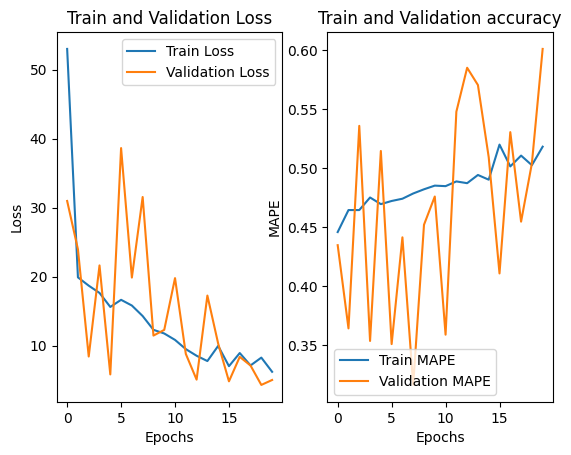

In [21]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train MAPE')
plt.plot(history.history['val_accuracy'], label='Validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.title('Train and Validation accuracy')
plt.legend()

In [22]:
# Affichage de la synthèse du modèle
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               768       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
Total params: 9414 (36.77 KB)
Trainable params: 9414 (36.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# Évaluation du modèle sur l'ensemble de test
score = model.evaluate(X_test_normalized, y_test)
print(score)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Model error rate : %.2f%%" % ((1 - score[1]) * 100))

59/59 [==============================] - 0s 2ms/step - loss: 2.2546 - accuracy: 0.3294
[2.254595994949341, 0.32943055033683777]
Test loss: 2.254595994949341
Test accuracy: 0.32943055033683777
Model error rate : 67.06%


In [35]:
x=X_test_normalized[1]
x = np.reshape(x, (-1, 5))
print(x)

[[0.25       0.58470521 0.44810705 0.58371582 0.39282305]]


In [43]:

def Analysis(etat):
  objects = ('Classe1', 'Classe2', 'Classe3', 'Classe4', 'Classe5', 'Classe6')
  y_pos = np.arange(len(objects))
  plt.figure(figsize=(5, 5))
  plt.bar(y_pos, etat, align='center', alpha=0.5)
  plt.xticks(y_pos, objects, rotation=45)
  plt.ylabel('Pourcentage')
  plt.title('Classe')
  plt.show


1/1 [==============================] - 0s 29ms/step


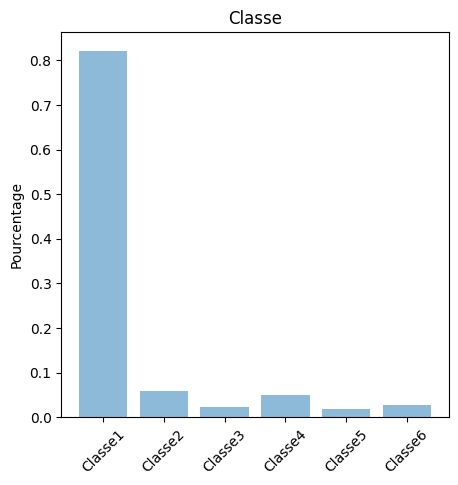

In [44]:
custom = model.predict(x)
Analysis(custom[0])
plt.show()

la valeur que X_test_normalized[i] prenne en i est  0
1/1 [==============================] - 0s 24ms/step


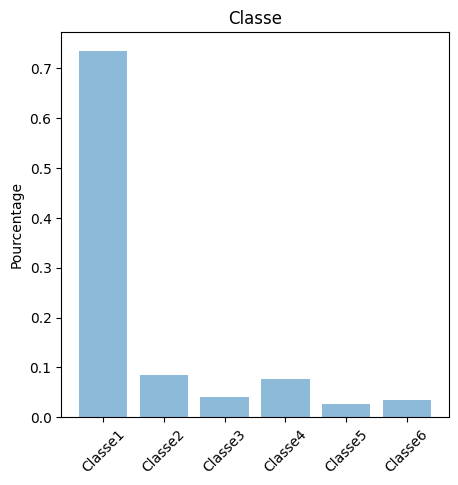

la valeur que X_test_normalized[i] prenne en i est  1
1/1 [==============================] - 0s 38ms/step


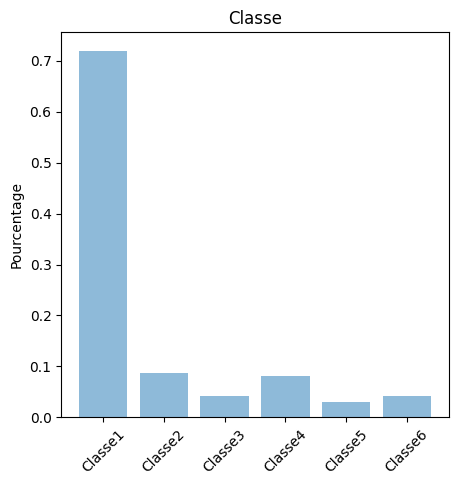

la valeur que X_test_normalized[i] prenne en i est  2
1/1 [==============================] - 0s 21ms/step


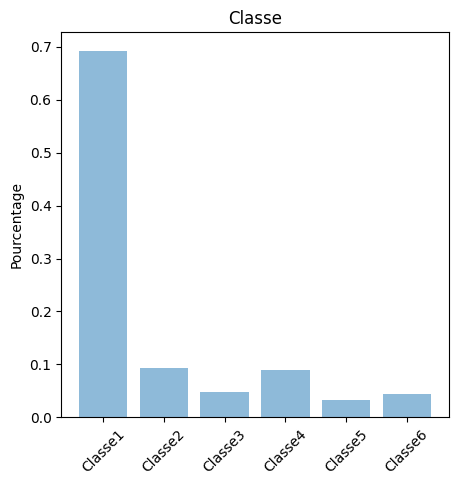

la valeur que X_test_normalized[i] prenne en i est  3
1/1 [==============================] - 0s 21ms/step


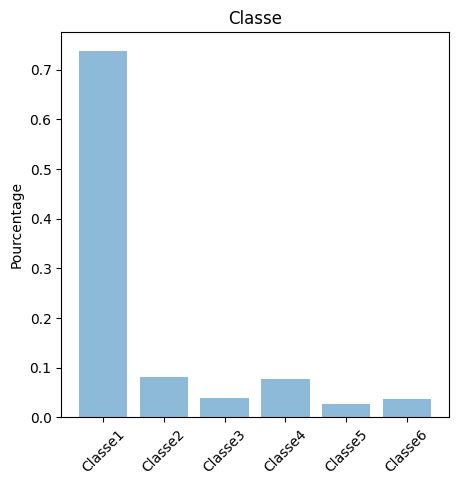

la valeur que X_test_normalized[i] prenne en i est  4
1/1 [==============================] - 0s 20ms/step


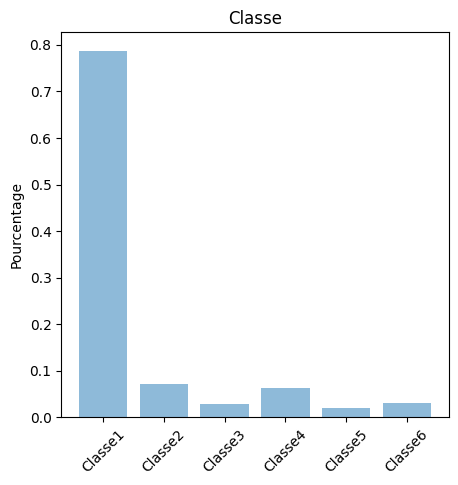

la valeur que X_test_normalized[i] prenne en i est  5
1/1 [==============================] - 0s 21ms/step


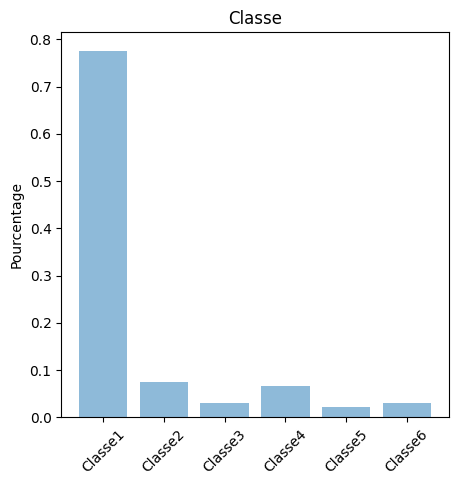

la valeur que X_test_normalized[i] prenne en i est  6
1/1 [==============================] - 0s 21ms/step


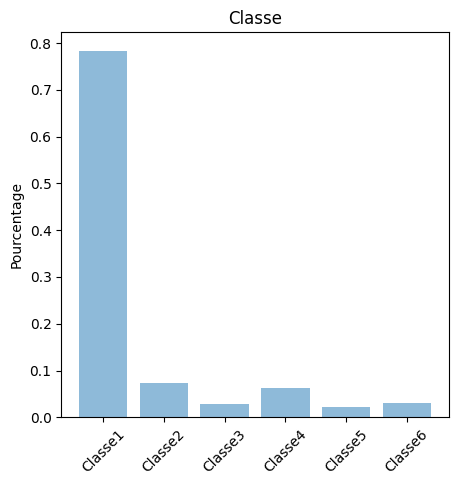

la valeur que X_test_normalized[i] prenne en i est  7
1/1 [==============================] - 0s 20ms/step


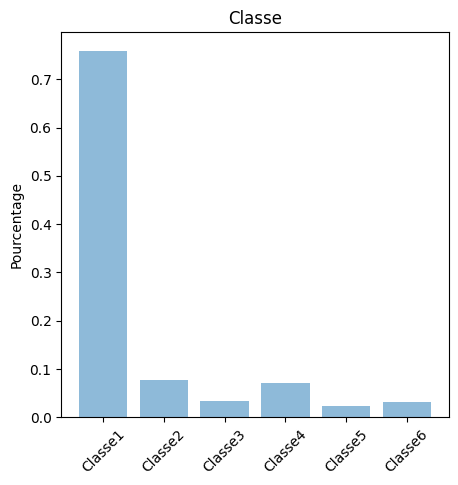

la valeur que X_test_normalized[i] prenne en i est  8
1/1 [==============================] - 0s 23ms/step


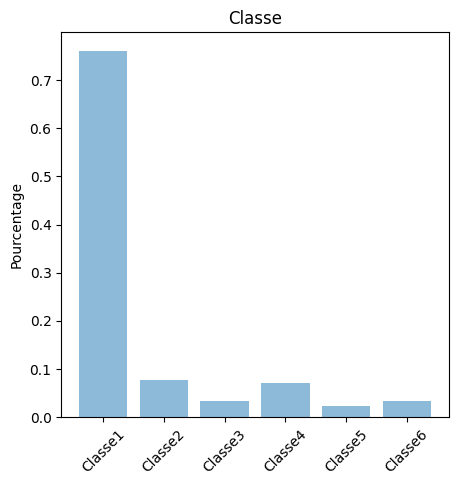

la valeur que X_test_normalized[i] prenne en i est  9
1/1 [==============================] - 0s 23ms/step


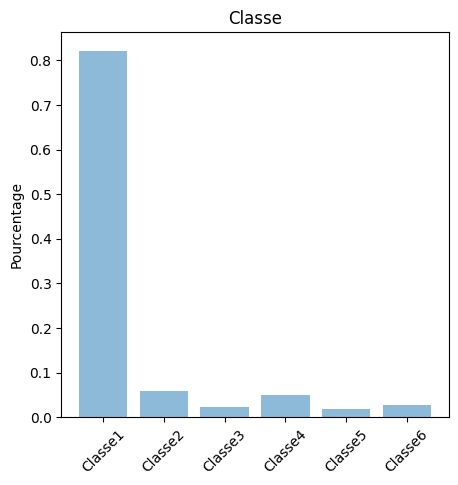

In [45]:
for i in range(10):
  print("la valeur que X_test_normalized[i] prenne en i est ",i)
  x=X_test_normalized[i]
  x = np.reshape(x, (-1, 5))
  custom = model.predict(x)
  Analysis(custom[0])
  plt.show()

On constate que à chaque fois on change la valeur que x prenne les resultats restents les memes